##### Data manipulation and visualisation with stock data amd creating OHLC chart.

In [27]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [28]:
# 100 day rolling moving average. So this will take the current price, and the prices from the
#past 99 days, add them up, divide by 100, and there's your current 100-day moving average.

df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
print(df.head())

                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2014-12-31  45.136002  44.450001  44.618000  44.481998  11487500.0  44.481998   
2015-01-02  44.650002  42.652000  44.574001  43.862000  23822000.0  43.862000   
2015-01-05  43.299999  41.431999  42.910000  42.018002  26842500.0  42.018002   
2015-01-06  42.840000  40.841999  42.012001  42.256001  31309500.0  42.256001   
2015-01-07  42.956001  41.956001  42.669998  42.189999  14842000.0  42.189999   

                100ma  
Date                   
2014-12-31  44.481998  
2015-01-02  44.171999  
2015-01-05  43.454000  
2015-01-06  43.154500  
2015-01-07  42.961600  


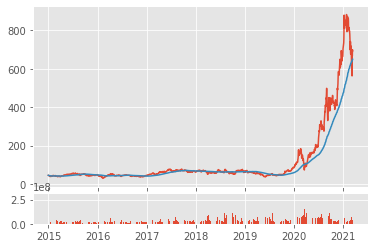

In [29]:
# Plotting graph 

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

### OHLC chart - candlesticks.

In [30]:
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

In [33]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2014-12-31  44.481998  44.481998  41.332001  41.332001
2015-01-10  40.442001  40.849998  38.374001  38.613998
2015-01-20  38.386002  41.310001  38.386002  41.040001
2015-01-30  40.720001  44.198002  40.720001  43.472000
2015-02-09  43.495998  43.495998  40.576000  40.891998


In [34]:
df_ohlc = df_ohlc.reset_index()

In [35]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

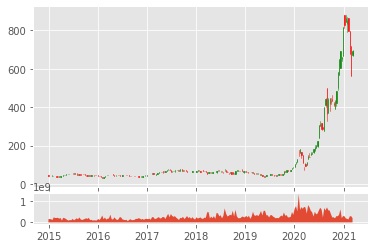

In [37]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()